# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [2]:
# load data
df = pd.read_csv("nhanes_2015_2016.csv")

In [3]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

$H_o$ : $p_{women}$ = $p_{men}$  
$H_A$ : $p_{women}$ $\neq$ $p_{men}$  

In [5]:
# subset of women
df_femaleSmoke = df.query("RIAGENDR == 2")['SMQ020']
df_femaleSmoke = df_femaleSmoke.dropna().reset_index(drop=True)

# subset of men
df_maleSmoke = df.query("RIAGENDR == 1")['SMQ020']
df_maleSmoke = df_maleSmoke.dropna().reset_index(drop=True)

In [6]:
df_femaleSmoke.unique()

array([2, 1, 9], dtype=int64)

In [7]:
df_maleSmoke.unique()

array([1, 2, 7, 9], dtype=int64)

In [8]:
# 1 reps 'Yes' while the rest rep 'No' or 'I don't know'
df_femaleSmoke = df_femaleSmoke.replace({1:1, 2:0, 9:0})
df_maleSmoke = df_maleSmoke.replace({1:1, 2:0, 7:0, 9:0})

In [9]:
print("Number and Proportion of Women who Smoke:")
n_femaleSmoke = np.sum(df_femaleSmoke==1)
prop_femaleSmoke = np.mean(df_femaleSmoke==1)
print("{}, {:.3f}".format(n_femaleSmoke, prop_femaleSmoke))

print("\nNumber and Proportion of Men who Smoke:")
n_maleSmoke = np.sum(df_maleSmoke==1)
prop_maleSmoke = np.mean(df_maleSmoke==1)
print("{}, {:.3f}".format(n_maleSmoke, prop_maleSmoke))

Number and Proportion of Women who Smoke:
906, 0.304

Number and Proportion of Men who Smoke:
1413, 0.512


In [10]:
print("tstat, p-value, df: ")
sm.stats.ttest_ind(df_femaleSmoke, df_maleSmoke)

tstat, p-value, df: 


(-16.38166733131429, 5.561943460353374e-59, 5733.0)

__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.

The propotion of women who smoke is significantly different from the proportion of men who smoke. We will reject the null hypothesis.

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

95% CI for the proportion of men who smoke

In [11]:
ci_low, ci_upp = sm.stats.proportion_confint(n_femaleSmoke, len(df_femaleSmoke==1), alpha=0.05)

print("95% CI for Male Smokers: ({:.4f}, {:.4f})".format(ci_low, ci_upp))

95% CI for Male Smokers: (0.2879, 0.3210)


95% CI for the proportion of women who smoke

In [12]:
ci_low, ci_upp = sm.stats.proportion_confint(n_maleSmoke, len(df_maleSmoke==1), alpha=0.05)

print("95% CI for Female Smokers: ({:.4f}, {:.4f})".format(ci_low, ci_upp))

95% CI for Female Smokers: (0.4935, 0.5308)


95% for the difference in the rates of smoking between women and men

In [13]:
## proportion difference
prop_genderDiff = prop_femaleSmoke - prop_maleSmoke
prop_genderDiff

-0.20770659659296842

In [14]:
ci_low, ci_upp = sm.stats.confint_proportions_2indep(count1=n_femaleSmoke, count2=n_maleSmoke,
                                                     nobs1=len(df_femaleSmoke==1), nobs2=len(df_maleSmoke==1),
                                                     alpha=0.05)

print("95% CI for Difference in Proportion of Female Smokers and Male Smokers: \n({:.4f}, {:.4f})".format(ci_low, ci_upp))
print("Proportion Difference: {:.4f}".format(prop_genderDiff))

95% CI for Difference in Proportion of Female Smokers and Male Smokers: 
(-0.2324, -0.1826)
Proportion Difference: -0.2077


__Q1c.__ Comment on any ways in which the confidence intervals that you found in part b reinforce, contradict, or add support to the hypothesis test conducted in part a.

The confidence intervals support our conclusion that the proportion of females who smoke `(0.49, 0.53)` is significant from the proportion of males who smoke `(0.29, 0.32)`. The confidence interval for the proportion of females who smoke does not overlap with the proportions of males who smoke. The confidence interval for the difference between the two proportions `(-0.23, -0.18)` does not include zero.

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

In [15]:
df.DMDEDUC2.unique()

array([ 5.,  3.,  4.,  2., nan,  1.,  9.])

In [16]:
# subset based on college graduate or not
df["DMDEDUC2x"] = df.DMDEDUC2.replace({1: "Non College Grad", 2: "Non College Grad", 3: "Non College Grad", 
                                       4: "Non College Grad", 5: "College Grad", 9: "Non College Grad"})

df_collegeGrad = df.query("DMDEDUC2x == 'College Grad'")
df_NotCollegeGrad = df.query("DMDEDUC2x == 'Non College Grad'")

In [17]:
# getting the height values for each subset and removing null values
colGrad_heightCM = df_collegeGrad['BMXHT']
colGrad_heightCM = colGrad_heightCM.dropna()
colGrad_heightCM.reset_index(drop=True, inplace=True)

NotColGrad_heightCM = df_NotCollegeGrad['BMXHT']
NotColGrad_heightCM = NotColGrad_heightCM.dropna()
NotColGrad_heightCM.reset_index(drop=True, inplace=True)

Population Mean Height (cm) Difference Hypothesis Test

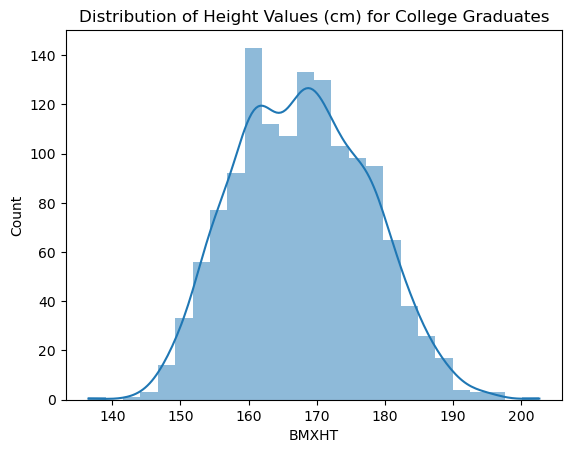

In [18]:
# let's have a view of the data
sns.histplot(colGrad_heightCM, kde=True, edgecolor=None)
plt.title("Distribution of Height Values (cm) for College Graduates");

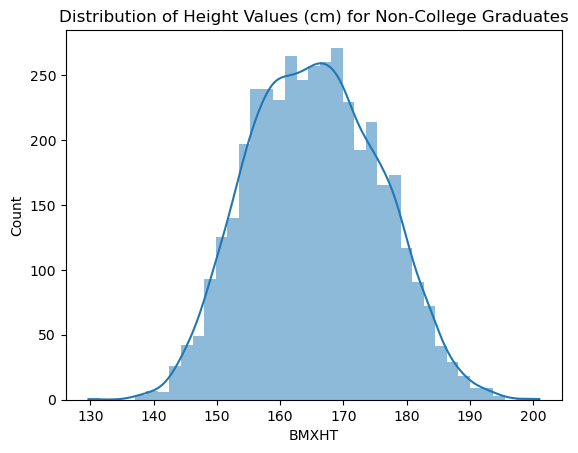

In [19]:
# let's have a view of the data
sns.histplot(NotColGrad_heightCM, kde=True, edgecolor=None)
plt.title("Distribution of Height Values (cm) for Non-College Graduates");

We can see that both data are approximately normal. Let's view the descriptive stats of both data.

In [20]:
pd.DataFrame({'College Graduates':colGrad_heightCM.describe(), 
              'Not College Graduates':NotColGrad_heightCM.describe()})

,College Graduates,Not College Graduates
count,1355.000000,4062.000000
mean,167.855351,165.463959
std,9.705433,10.172964
min,136.500000,129.700000
25%,160.500000,158.000000
50%,167.700000,165.300000
75%,175.000000,172.900000
max,202.700000,201.000000


In [21]:
z_stat, p_val = sm.stats.ztest(colGrad_heightCM, NotColGrad_heightCM)

print("z-statistic, p-value:")
(z_stat, p_val)

z-statistic, p-value:


(7.578706943765076, 3.4901585776605263e-14)

Conducting a hypothesis test for the average heights in inches

In [22]:
z_stat, p_val = sm.stats.ztest(colGrad_heightCM/2.54, NotColGrad_heightCM/2.54)

print("z-statistic, p-value:")
(z_stat, p_val)

z-statistic, p-value:


(7.578706943764969, 3.4901585776634256e-14)

__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?

Yes. The p-value is very small which means that we should reject the null hypothesis in favor of the alternative one.

__Q2b:__ How do the results obtained using the heights expressed in inches compare to the results obtained using the heights expressed in centimeters?

The z-statistics and p-values obtained in both tests are very similar.

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [23]:
# creating subset of men between ages 50 and 60 and between ages 30 and 40
df_Male30to40 = df.query("(RIDAGEYR >= 30 & RIDAGEYR <= 40) & RIAGENDR == 1")
df_Male50to60 = df.query("(RIDAGEYR >= 50 & RIDAGEYR <= 60) & RIAGENDR == 1")

print(f"{df_Male30to40['RIDAGEYR'].min()}, {df_Male30to40['RIDAGEYR'].max()}")
print(f"{df_Male50to60['RIDAGEYR'].min()}, {df_Male50to60['RIDAGEYR'].max()}")

30, 40
50, 60


In [24]:
bmi_male30to40 = df_Male30to40["BMXBMI"]
bmi_male30to40 = bmi_male30to40.dropna()
bmi_male30to40.reset_index(drop=True, inplace=True)

bmi_male50to60 = df_Male50to60["BMXBMI"]
bmi_male50to60 = bmi_male50to60.dropna()
bmi_male50to60.reset_index(drop=True, inplace=True)

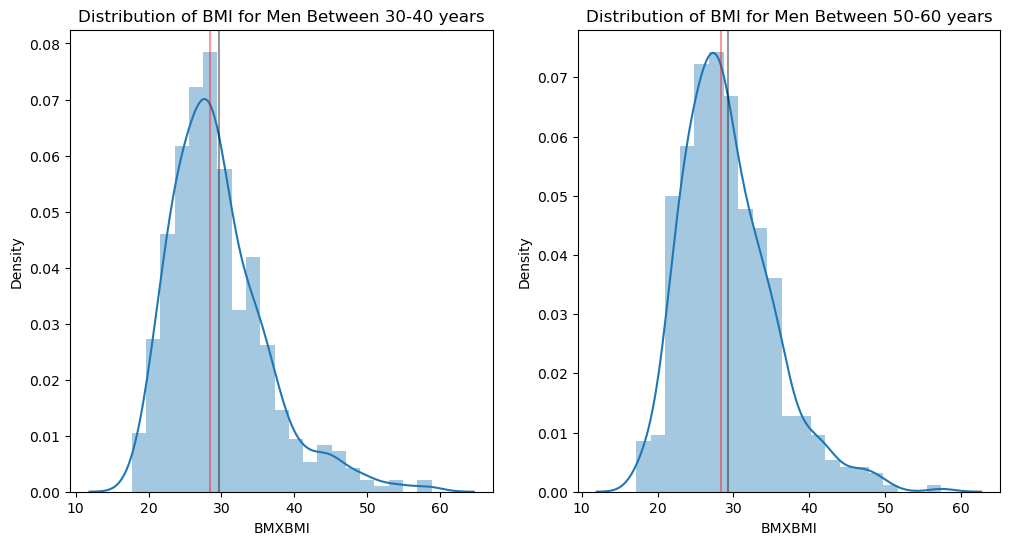

In [25]:
# let's have a view of the data
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(bmi_male30to40, stat='density', alpha=0.4, edgecolor=None, ax=axes[0])
sns.kdeplot(bmi_male30to40, ax=axes[0])
axes[0].axvline(bmi_male30to40.mean(), color='black', alpha=0.4)
axes[0].axvline(bmi_male30to40.median(), color='red', alpha=0.4)
axes[0].set_title("Distribution of BMI for Men Between 30-40 years");

# let's have a view of the data
sns.histplot(bmi_male50to60, stat='density', alpha=0.4, edgecolor=None, ax=axes[1])
sns.kdeplot(bmi_male50to60, ax=axes[1])
axes[1].axvline(bmi_male50to60.mean(), color='black', alpha=0.4)
axes[1].axvline(bmi_male50to60.median(), color='red', alpha=0.4)
axes[1].set_title("Distribution of BMI for Men Between 50-60 years");

The data appears skewed to right. Let's apply a log transform to the data. Note that the red line represents the median BMI while the black line represents the mean BMI.

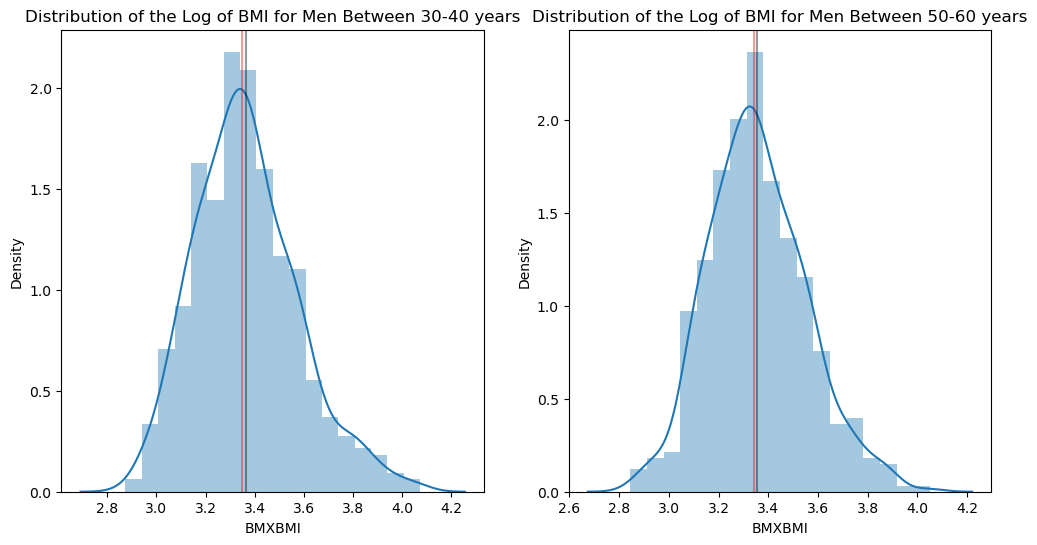

In [26]:
# let's have a view of the data
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(np.log(bmi_male30to40), stat='density', alpha=0.4, edgecolor=None, ax=axes[0])
sns.kdeplot(np.log(bmi_male30to40), ax=axes[0])
axes[0].axvline(np.log(bmi_male30to40).mean(), color='black', alpha=0.4)
axes[0].axvline(np.log(bmi_male30to40).median(), color='red', alpha=0.4)
axes[0].set_title("Distribution of the Log of BMI for Men Between 30-40 years");

# let's have a view of the data
sns.histplot(np.log(bmi_male50to60), stat='density', alpha=0.4, edgecolor=None, ax=axes[1])
sns.kdeplot(np.log(bmi_male50to60), ax=axes[1])
axes[1].axvline(np.log(bmi_male50to60).mean(), color='black', alpha=0.4)
axes[1].axvline(np.log(bmi_male50to60).median(), color='red', alpha=0.4)
axes[1].set_title("Distribution of the Log of BMI for Men Between 50-60 years");

In [27]:
log_bmi_male30to40 = np.log(bmi_male30to40)
log_bmi_male50to60 = np.log(bmi_male50to60)

In [28]:
z_stat, p_val = sm.stats.ztest(log_bmi_male30to40, log_bmi_male50to60)

print("z-statistic, p-value:")
print(f'{z_stat}, {p_val}')

z-statistic, p-value:
0.7057844184100666, 0.4803222133688403


__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?

In both, the mean log BMI does not significantly differ between both age groups. The p-value is higher than our alpha level of 0.05. Therefore, we fail to reject the null hypothesis.

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

In [29]:
# subsetting data for women between the ages of 30 and 40
df_Female30to40_ColGrad = df_collegeGrad.query("(RIDAGEYR >= 30 & RIDAGEYR <= 40) & RIAGENDR == 2")
df_Female30to40_NotColGrad = df_NotCollegeGrad.query("(RIDAGEYR >= 30 & RIDAGEYR <= 40) & RIAGENDR == 2")

# subset BMI data
bmi_ColGraduate = df_Female30to40_ColGrad['BMXBMI']
bmi_ColGraduate = bmi_ColGraduate.dropna()
bmi_ColGraduate.reset_index(inplace=True, drop=True)

bmi_NotColGraduate = df_Female30to40_NotColGrad['BMXBMI']
bmi_NotColGraduate = bmi_NotColGraduate.dropna()
bmi_NotColGraduate.reset_index(inplace=True, drop=True)

count    171.000000
mean      27.808187
std        7.358264
min       17.100000
25%       22.750000
50%       26.300000
75%       31.150000
max       62.700000
Name: BMXBMI, dtype: float64


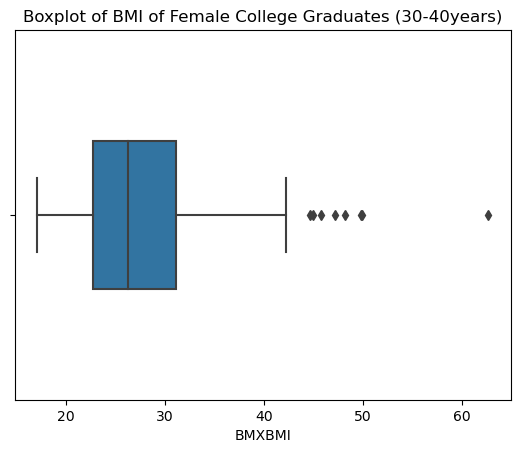

In [30]:
sns.boxplot(x=bmi_ColGraduate, width=0.4)
plt.title("Boxplot of BMI of Female College Graduates (30-40years)");
print(bmi_ColGraduate.describe())

count    354.000000
mean      31.257345
std        8.256083
min       16.600000
25%       25.300000
50%       29.500000
75%       35.875000
max       60.900000
Name: BMXBMI, dtype: float64

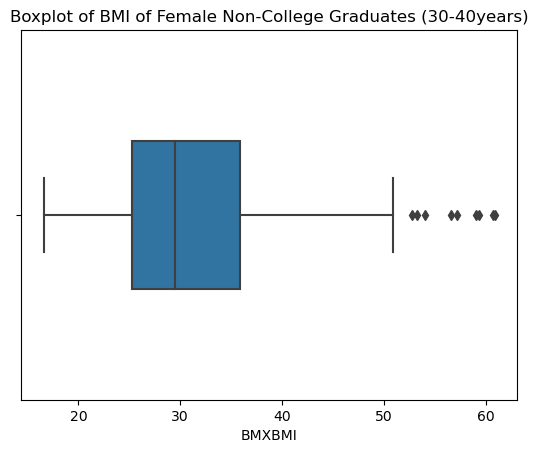

In [31]:
sns.boxplot(x=bmi_NotColGraduate, width=0.4)
plt.title("Boxplot of BMI of Female Non-College Graduates (30-40years)");
bmi_NotColGraduate.describe()

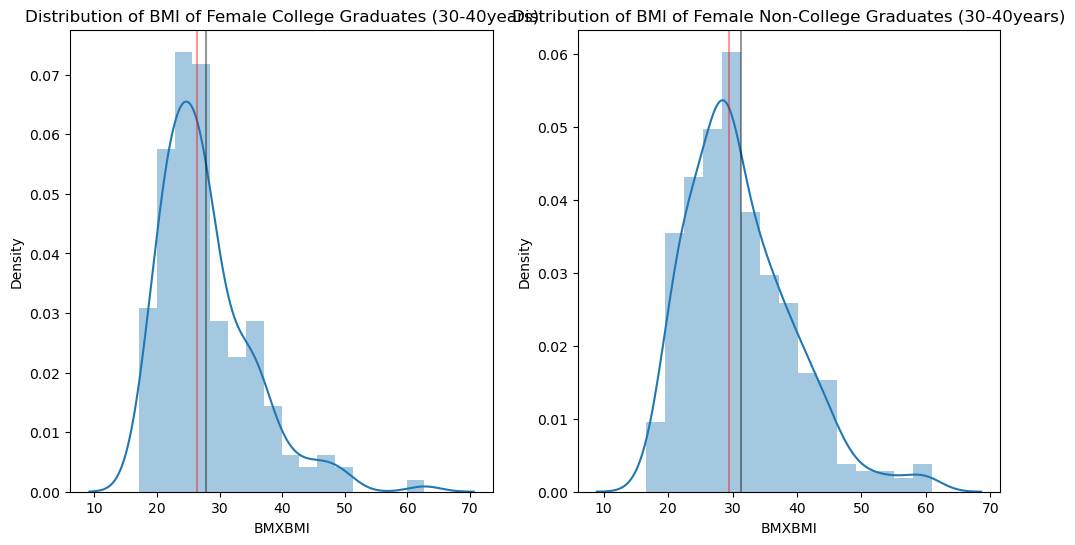

In [32]:
# let's have a view of the data
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(bmi_ColGraduate, stat='density', alpha=0.4, edgecolor=None, ax=axes[0])
sns.kdeplot(bmi_ColGraduate, ax=axes[0])
axes[0].axvline(bmi_ColGraduate.mean(), color='black', alpha=0.4)
axes[0].axvline(bmi_ColGraduate.median(), color='red', alpha=0.4)
axes[0].set_title("Distribution of BMI of Female College Graduates (30-40years)");

# let's have a view of the data
sns.histplot(bmi_NotColGraduate, stat='density', alpha=0.4, edgecolor=None, ax=axes[1])
sns.kdeplot(bmi_NotColGraduate, ax=axes[1])
axes[1].axvline(bmi_NotColGraduate.mean(), color='black', alpha=0.4)
axes[1].axvline(bmi_NotColGraduate.median(), color='red', alpha=0.4)
axes[1].set_title("Distribution of BMI of Female Non-College Graduates (30-40years)");

This one skewed sha but they didn't tell us to perform any log transform so we meuve!

In [33]:
# comparing variance
np.var(bmi_ColGraduate)/np.var(bmi_NotColGraduate)

0.7919249182613639

We can see that both populations have unequal variances.

In [34]:
bmi_ColGraduate = sm.stats.DescrStatsW(bmi_ColGraduate)
bmi_NotColGraduate = sm.stats.DescrStatsW(bmi_NotColGraduate)

print("pooled: ", sm.stats.CompareMeans(bmi_ColGraduate, bmi_NotColGraduate).ztest_ind(usevar="pooled"))
print("unequal: ", sm.stats.CompareMeans(bmi_ColGraduate, bmi_NotColGraduate).ztest_ind(usevar="unequal"))

pooled:  (-4.643908450956424, 3.4187910067116893e-06)
unequal:  (-4.833662355599101, 1.340438616920389e-06)


The above method is used because solving for unequal variances isn't implemented in the `sm.stats.ztest()` function.

__Q4a.__ Comment on the strength of evidence against the null hypothesis that these two populations have equal mean BMI.

The populations don't have an equal BMI and we will reject the null hypothesis since the p-value is really small and below our significant level for the alternative hypothesis.

__Q4b.__ Comment on the degree to which the two populations have different variances, and on the extent to which the results using different approaches to estimating the standard error of the mean difference give divergent results.

The variance difference between the two populations is not that huge therefore, the two approaches result in very close values and we reach the same conclusion.

## Question 5

Conduct a test of the null hypothesis that the first and second diastolic blood pressure measurements within a subject have the same mean values.

We'd have to conduct a **paired t-test** because the two samples (first and second diastolic blood pressure) are related. `sm.stats.ztest()` or `sm.stats.ttest_ind()` won't be useful because it relies on the data provided being independent of the other. Since the first and second diastolic blood pressure is measured from the same person, it rules out the assumption of indepence.

In [35]:
# create subset
dx = df[['BPXDI1', 'BPXDI2']]
dx = dx.dropna().reset_index(drop=True)

# find the difference in diastolic blood pressures
diff_diast = dx.BPXDI1 - dx.BPXDI2

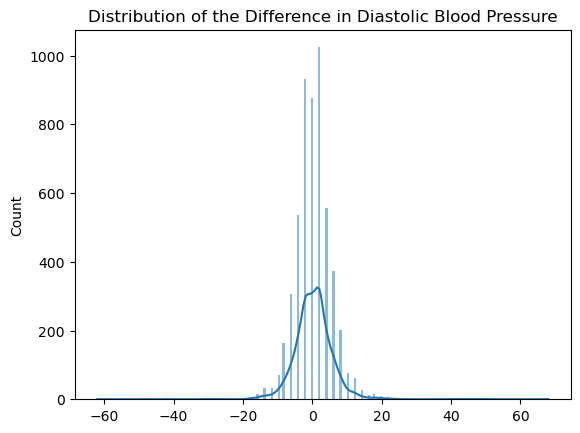

In [36]:
# let's have a view of the data
#fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(diff_diast, kde=True, edgecolor=None)
plt.title("Distribution of the Difference in Diastolic Blood Pressure");

Standard paired t-test for two samples `y1` and `y2` is just the one sample t-test applied on the difference `d=y1-y2`.

In [37]:
# Perform the paired t-test
z_stat, p_value = sm.stats.ztest(diff_diast)
# Print the results
print('Paired t-test results:')
print('z-statistic =', z_stat)
print('p-value =', p_value)

Paired t-test results:
z-statistic = 4.140387087476751
p-value = 3.467202439743513e-05


__Q5a.__ Briefly describe your findings for an audience that is not familiar with statistical hypothesis testing.

The first diastolic blood pressure is significantly different from the second diastolic blood pressure.

__Q5b.__ Pretend that the first and second diastolic blood pressure measurements were taken on different people.  Modfify the analysis above as appropriate for this setting.

Now we can use an two sample z-test to assess this since we're assuming independence.

In [38]:
# Perform the paired t-test
dx.BPXDI1 = dx.BPXDI1.dropna().reset_index(drop=True)
dx.BPXDI2 = dx.BPXDI2.dropna().reset_index(drop=True)

z_stat, p_value = sm.stats.ztest(dx.BPXDI1, dx.BPXDI2)
# Print the results
print('Two-sample z-test results:')
print('z-statistic =', z_stat)
print('p-value =', p_value)

Two-sample z-test results:
z-statistic = 1.405785955157218
p-value = 0.15978769381769953


In [42]:
sm.stats.ttest_ind(dx['BPXDI1'], dx['BPXDI2'])

(1.4057859551572176, 0.15981663261014006, 10736.0)

__Q5c.__ Briefly describe how the approaches used and the results obtained in the preceeding two parts of the question differ.

When treating the two measurements as unpaired and as separate individuals, we failed to reject the null hypothesis and the p-value was large but when treating the two measurements as paired and matched individuals, we rejected the null hypothesis as the p-value was below our significance level.